                       Нижегородский государственный университет имени Н. И. Лобачевского
 
                                          Радиофизический факультет

                                            Кафедра математики
                                            

####                          Отчет по лабораторной работе №6 "Поиск экстремума функции многих переменных"
                                              
                                              Вариант 9
                                                                                  
                                                                                  
                                                                                  
                                                                                  
                                                                                  Выполнила: Емельянова Анастасия, 430 гр.
                                                                                  Проверил: Шиндин А. В.

                                          Нижний Новгород, 2016 год.
                                    

### Содержание
1. Постановка задачи.
2. Описание используемых алгоритмов.
3. Исходный код программы. Результаты работы программы.
4. Анализ результатов.

**1. Постановка задачи**

1) Выполнить задание, указанное в билете. (3 балла)
   
   Найти точку максимума функции 
   $$f(x_1, x_2) = \frac 1 2 x_1x_2 + (47-x_1-x_2)(\frac {x_1} 3 + \frac {x_2} 4);$$ 
   $$x_1^0 = 18,    x_2^0 = 22$$ методом **покоординатного спуска**. Для поиска максимума одной переменной использовать **метод золотого сечения**. В окрестности точки максимума оценить *овражность*, построить *линии уровня* и *траекторию поиска*. Исследовать *условия сходимости*.
   

2) Обеспечить работу программы с исходной функцией в режиме **«черного ящика» (black box)**. (+3 балла).


3) Обеспечить работу программы с функциями с размерностью, на единицу выше заданной. (+3 балла)


4) Обеспечить работу программы с функциями любой размерности (до  10 включительно). (+3 балла)

**2. Описание используемых алгоритмов**

Большинство процессов, используемых для приближенного решения задачи поиска экстремума функции можно представить как итерационные в виде: $$x_{k+1} = x_k + \alpha_k p_k, (1) $$
где $p_k$ - вектор, определяющий направление движения от точки $x_k$ к точке $x_{k+1}$, $\alpha_k$ - числовой множитель, величина которого задает длину шага в направлении $p_k$. 
Метод называется методом *спуска*, если при каждом $k$ направление $p_k$ - направление спуска, а число $\alpha_k$ таково, что
$$f(x_{k+1}) = f(x_k + \alpha_k p_k) < f(x_k). (2)$$
**Метод покоординатного спуска** - это метод нулевого порядка, т. е. он не требует вычисления производных. Для построения минимизирующей последовательности используется формула $(1)$. При этом вектор $p_k$ определяется по правилу (циклический покоординатный спуск): $$p_k = e_{k-[k/n]*n+1}, k = 0, 1, 2, . . . ,$$ где $[t]$-целая часть числа $t$, $e_j = (0, . . . , 0, 1, 0, . . . 0)$ (единица стоит на j-ом месте), $j = 1, . . ., n $, $n$ - число переменных.
Число $\alpha_k \in (-(\infty),\infty)$ можно определять,например, следующим способом: $f(x_k + \alpha_k p_k) = min_{-{\infty}<\alpha<\infty} f(x_k + \alpha p_k)$.
Точная нижняя грань функции $f_k(\alpha) = f(x_k +\alpha p_k)$ на полуоси $\alpha > 0$ может и не достигаться. Но даже если она достигается, точное определение величины $\alpha_k$ как точки глобального
на полуоси минимума функции $f_k(\alpha)$ не всегда возможно. Поэтому
на практике имеет смысл заменить задачу нахождения $min_{\alpha>0} f_k(\alpha)$ задачей отыскания минимума $f_k(\alpha)$ на том или ином (достаточно большом) отрезке $[0, a].$ В случае, когда $f_k(\alpha)$ унимодальна на $[0,a],$ для приближенного решения последней задачи применяют методы одномерного поиска. 

**Метод золотого сечения** - это один из методов одномерного поиска, он заключается в разбиении отрезка на 2 части в пропорциях золотого сечения. Отношение длины всего отрезка к большей части равно отношению большей части к меньшей и равно числу $\tau=\frac {1+\sqrt 5} 2\approx 1.6180$ ($\tau$ -корень уравнения $\tau^2 = 1+\tau$ ). В методе золотого сечения точки $x_1$ и $x_2$ на каждом отрезке неопределенности $[a, b]$ выбираются по правилу $x_1 = b - \frac{b - a} \tau,$ $x_2 = a + \frac {b - a} \tau.$
Показатель эффективности метода равен $E_m = \tau^{1-m}.$

**3. Исходный код программы. Результат работы программы.**

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
import array
import numpy.linalg as lin
import pylab
from mpl_toolkits.mplot3d import Axes3D

График функции: 


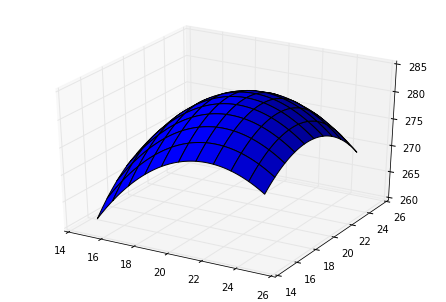

In [4]:
def makeData ():
    x1 = np.arange (15, 25, 0.1)
    x2 = np.arange (15, 25, 0.1)
    x1grid, x2grid = np.meshgrid(x1, x2)
    fgrid= 1/2*x1grid*x2grid+(47-x1grid-x2grid)*(x1grid/3+x2grid/4)
    return x1grid, x2grid, fgrid

x1, x2, f = makeData()

fig = pylab.figure()
axes = Axes3D(fig)
print('График функции: ')
axes.plot_surface(x1,x2,f)
pylab.show()

In [5]:
def f(x01):
        return 1/2*x01[0,0]*x01[1,0]+(47-x01[0,0]-x01[1,0])*(x01[0,0]/3+x01[1,0]/4)
def func(f,x0,e,kk):
    tau=1.6180339887
    global n
    n=len(x0)
    global k
    k=0
    global o
    o=0
    global j
    j=k-math.trunc(k/n)*n+1
    global x00
    x00=np.zeros((n,1))
    global tr
    tr=np.zeros((1000,n))
    for i in range (0,n):
        x00[i,0]=x0[i]
    global x01
    x01=np.ones((n,1))
    for i in range (0,n):
        tr[0,i]=x00[i,0]
        def p(i):
            p=np.zeros((n,1))
            p[i,0]=1
            return p
    k+=1
    j=k-math.trunc(k/n)*n+1
    global a
    global b
    global c1
    global c2
    a=-2.5; b=3.5
    c2=a; c1=b
    while abs(b-a)>e:
        o+=1
        c1=a+(b-a)/tau
        c2=b-(b-a)/tau
        if f(x00+c1*p(j-1))>f(x00+c2*p(j-1)):
            a=c2
        else:
            b=c1
    x01=x00+b*p(j-1)
    x00=x01
    for i in range (0,n):
        tr[1,i]=x01[i,0]
    k+=1
    j=k-math.trunc(k/n)*n+1
    a=-2.5; b=3.5
    c2=a; c1=b
    while abs(b-a)>e:
        o+=1
        c1=a+(b-a)/tau
        c2=b-(b-a)/tau
        if f(x00+c1*p(j-1))>f(x00+c2*p(j-1)):
            a=c2
        else:
            b=c1
    x01=x00+b*p(j-1)
    for i in range (0,n):
        tr[2,i]=x01[i,0]
    while lin.norm(x00-x01)>e:
        k+=1
        if k>kk:
            print('Оборвался цикл, превышено максимально допустимое число итераций')
            break
        j=k-math.trunc(k/n)*n+1
        x00=x01
        a=-1; b=1
        c2=a; c1=b
        while abs(b-a)>e:
            o+=1
            c1=a+(b-a)/tau
            c2=b-(b-a)/tau
            if f(x00+c1*p(j-1))>f(x00+c2*p(j-1)):
                a=c2
            else:
                b=c1
        x01=x00+b*p(j-1)
        for i in range (0,n):
            tr[k+1,i]=x01[i,0]
    def gradient(f,x01):
        global proizvo
        proizvo=0
        global gradientt
        gradientt=np.zeros((n,1))
        global deltaX
        deltaX=np.zeros((n,1))
        for i in range (0,n):
            def pr(f,x01):
                deltaX[i,0]=e
                pr=(f(x01+deltaX)-f(x01))/e
                return pr
            gradientt[i,0]=pr(f,x01)
        for l in range (0,n):
            proizvo+=gradientt[l,0]
        return gradientt
    print('Градиент в точке максимума: ')
    print(gradient(f,x01))
    print('Производная в точке максимума: ', proizvo)
    def Gesse(f,x):
        global Gesse
        Gesse=np.zeros((n,n))
        for i in range(0,n):
            def gx(x):
                return gradient(f,x)[i,0]
            for j in range (0,n):
                global dltX
                dltX=np.zeros((n,1))
                dltX[j,0]=e
                Gesse[i,j]=(gx(x01+dltX)-gx(x01))/e
        return Gesse
    print('Матрица Гессе в точке максимума: ')
    print(Gesse(f,x01))   
    print('Собственные значения матрицы Гессе: ')
    print(lin.eigvals(Gesse(f,x01)))
    return x01
print('Максимум функции в точке\n', func(f,x0=[18,22],e=0.01,kk=1000), 'найден за ', k, 'итераций методом покоординатного спуска и', o,' итераций всего методом золотого сечения')
print('Максимальное значение функции ', f(x01))

Градиент в точке максимума: 
[[-0.00443685]
 [-0.00830942]]
Производная в точке максимума:  -0.0127462625585
Матрица Гессе в точке максимума: 
[[-0.66666667 -0.08333333]
 [-0.75       -0.58333333]]
Собственные значения матрицы Гессе: 
[-0.87844844 -0.37155156]
Максимум функции в точке
 [[ 21.00155281]
 [ 20.00081967]] найден за  6 итераций методом покоординатного спуска и 76  итераций всего методом золотого сечения
Максимальное значение функции  281.999998922


Траектория поиска: 


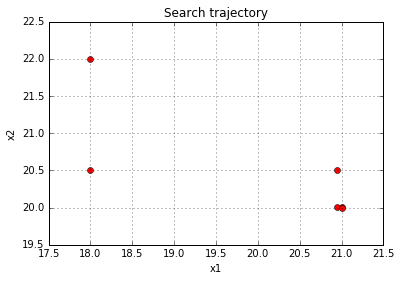

In [151]:
n=2
x1,x2=[],[]
for u in range (0,k+1):
    x1.append(tr[u,0])
    x2.append(tr[u,1])
plt.plot(x1, x2, 'o', color = 'red')
plt.xlabel('x1')
plt.ylabel(('x2'))
plt.title('Search trajectory')
plt.axis([17.5, 21.5, 19.5, 22.5])
plt.grid()
print('Траектория поиска: ')
plt.show()

Линии уровня: 


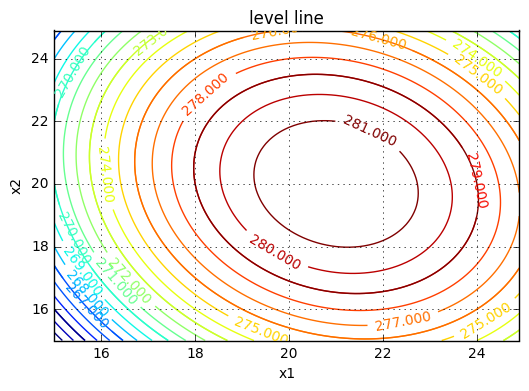

In [7]:
def makeData ():
    x1 = np.arange (15, 25, 0.1)
    x2 = np.arange (15, 25, 0.1)
    x1grid, x2grid = np.meshgrid(x1, x2)
    wgrid= 1/2*x1grid*x2grid+(47-x1grid-x2grid)*(x1grid/3+x2grid/4)
    return x1grid, x2grid, wgrid
x1, x2, w = makeData()
uroven = pylab.contour(x1, x2, w, 20)
pylab.xlabel('x1')
pylab.ylabel('x2')
pylab.title('level line')
pylab.clabel(uroven)
pylab.contour(x1, x2, w)
pylab.grid()
print('Линии уровня: ')
pylab.show()

In [1]:
print('Показатель овражности ', (-0.37155156)/(-0.87844844))

Показатель овражности  0.42296342401154474


**4. Анализ результатов.**

1) Методом покоординатного спуска и золотого сечения (для одномерного поиска экстремума) найден максимум функции $$f(x_1, x_2) = \frac 1 2 x_1x_2 + (47-x_1-x_2)(\frac {x_1} 3 + \frac {x_2} 4);$$ с начальной точкой $x_1^0 = 18,    x_2^0 = 22$.

***Максимум функции:***
$$x_1^*=21.00155281, x_2^*=20.00081967$$
с абсолютной погрешностью по норме $\epsilon=0.01 $
найден за 6 итераций методом покоординатного спуска и 76  итераций (всего) методом золотого сечения. Это говорит о том, что метод достаточно медленный.

Градиент в точке максимума: $(-0.00443685,-0.00830942)$

Производная в точке максимума:  $-0.0127462625585$

Матрица Гессе в точке максимума: 
$[[-0.66666667 -0.08333333]
 [-0.75       -0.58333333]]$
 
Собственные значения матрицы Гессе: $-0.87844844, -0.37155156$

Максимальное значение функции  $281.999998922$

Проверка с помощью программы *WolframAlpha* дает результат (21,20).

2) Построена траектория поиска на плоскости и линии уровня. Показатель овражности  $0.42296342401154474$. Собственные значения матрицы Гессе отрицательны.

3) Программа работает и считает производную, градиент, гессиан в точке экстремума в режиме черного ящика для $n$ переменных до $n=10$ и более.

 